# **Student Dropout Prediction:**

## **1. Data Exploration**

### 1.1 Dataset Overview


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Set visualization style

sns.set_palette("pastel")

# Display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Load the dataset
df = pd.read_csv('dataa.csv', sep=';')

# Display the first few rows to understand the structure
print("Dataset Preview:")
df.head()

Dataset Preview:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### 1.2 Understanding Features and Summary Statistics

In [ ]:
# Check dataset dimensions
print(f"Dataset dimensions: {df.shape}")

# Check column names
print("\nColumns in the dataset:")
print(df.columns.tolist())

# Summary statistics
print("\nSummary statistics:")
print(df.describe().T)

# Check data types
print("\nData types:")
print(df.dtypes)

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check unique values for categorical variables
print("\nUnique values in categorical columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts())
    print()

Dataset dimensions: (4424, 37)

Columns in the dataset:
['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployme

### 1.3 Converting 'Target' variable to Binary

In [ ]:
# Check the unique values in the Target variable
print("Original Target variable values:")
print(df['Target'].value_counts())

# Convert Target to binary (1 for dropout, 0 for non-dropout)
# Assuming 'Dropout' is the label for dropouts in the original data
df['Target_Binary'] = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

# Verify the conversion
print("\nConverted Target_Binary values:")
print(df['Target_Binary'].value_counts())

# Set Target_Binary as our new target variable
y = df['Target_Binary']

# Remove the original Target and the newly created Target_Binary from features
X = df.drop(['Target', 'Target_Binary'], axis=1)

# Display the first few rows after conversion
print("\nDataset after target conversion:")
df.head()

Original Target variable values:
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Converted Target_Binary values:
Target_Binary
0    3003
1    1421
Name: count, dtype: int64

Dataset after target conversion:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Target_Binary
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,0
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,0
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,0


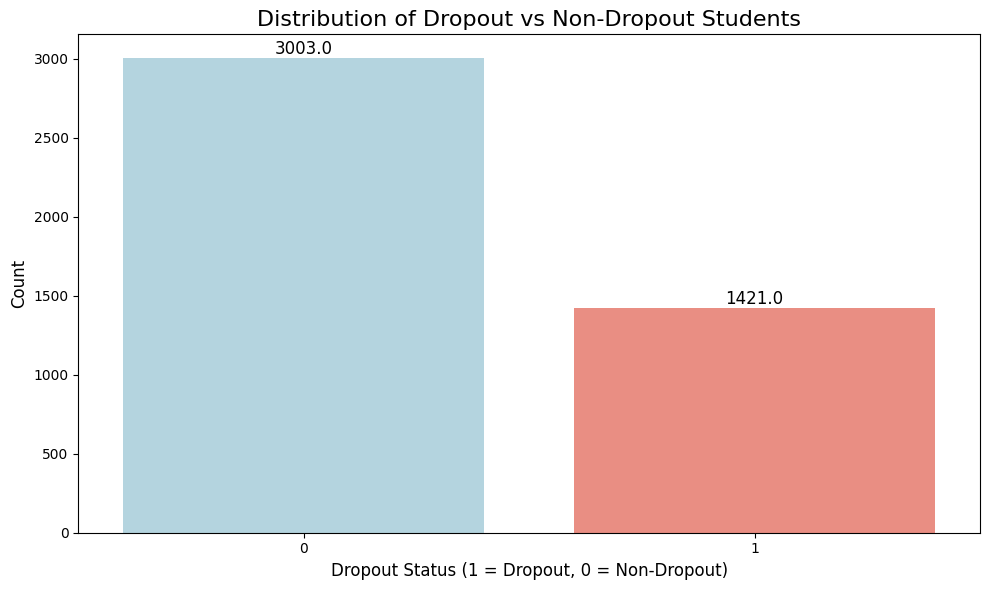

Overall dropout rate: 32.12%


In [ ]:
# 1. Distribution of the target variable
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Target_Binary', data=df, palette=['lightblue', 'salmon'])
plt.title('Distribution of Dropout vs Non-Dropout Students', fontsize=16)
plt.xlabel('Dropout Status (1 = Dropout, 0 = Non-Dropout)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# Calculate dropout rate
dropout_rate = df['Target_Binary'].mean() * 100
print(f"Overall dropout rate: {dropout_rate:.2f}%")

## **2. Data Visualization**

### 2.1 Attendance Pattern Impact (Daytime vs Evening)

<Figure size 1200x600 with 0 Axes>

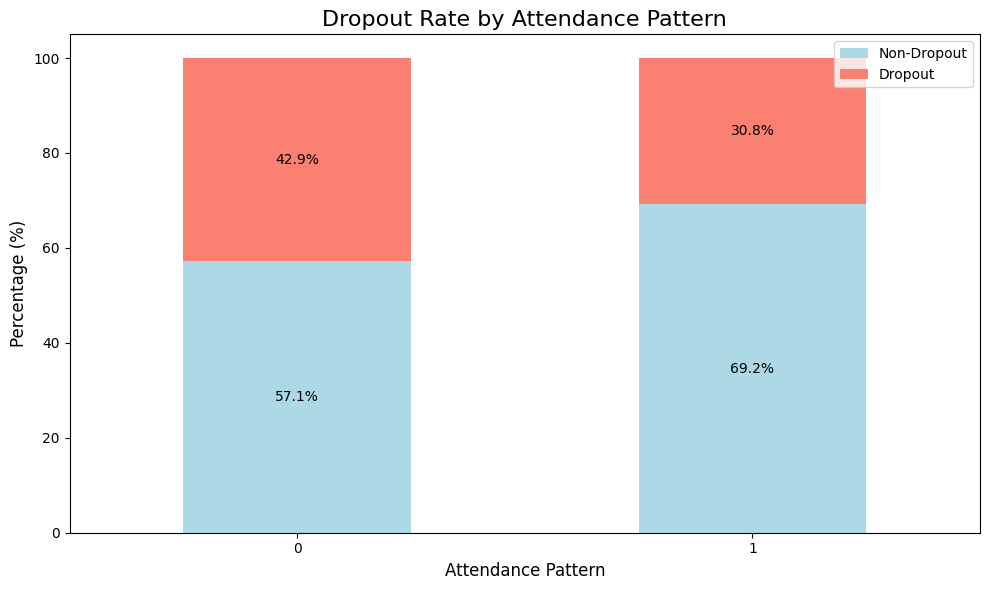

Chi-square test for Attendance Pattern and Dropout:
Chi2 value: 28.12
p-value: 0.0000
Significance: Significant at α = 0.05


In [ ]:
# Check the relationship between Daytime/Evening attendance and dropout
plt.figure(figsize=(12, 6))
attendance_dropout = pd.crosstab(df['Daytime/evening attendance\t'], df['Target_Binary'],
                                 normalize='index') * 100

ax = attendance_dropout.plot(kind='bar', stacked=True,
                            color=['lightblue', 'salmon'], figsize=(10, 6))
plt.title('Dropout Rate by Attendance Pattern', fontsize=16)
plt.xlabel('Attendance Pattern', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(['Non-Dropout', 'Dropout'], loc='upper right')

# Add percentage labels
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x(), p.get_y()
    if height > 5:  # Only label if segment is large enough
        ax.text(x + width/2, y + height/2, f'{height:.1f}%',
                ha='center', va='center')

plt.tight_layout()
plt.show()

# Chi-square test for statistical significance
from scipy.stats import chi2_contingency
contingency = pd.crosstab(df['Daytime/evening attendance\t'], df['Target_Binary'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-square test for Attendance Pattern and Dropout:")
print(f"Chi2 value: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"Significance: {'Significant' if p < 0.05 else 'Not significant'} at α = 0.05")

### 2.2 Marital Status Correlation

<Figure size 1200x600 with 0 Axes>

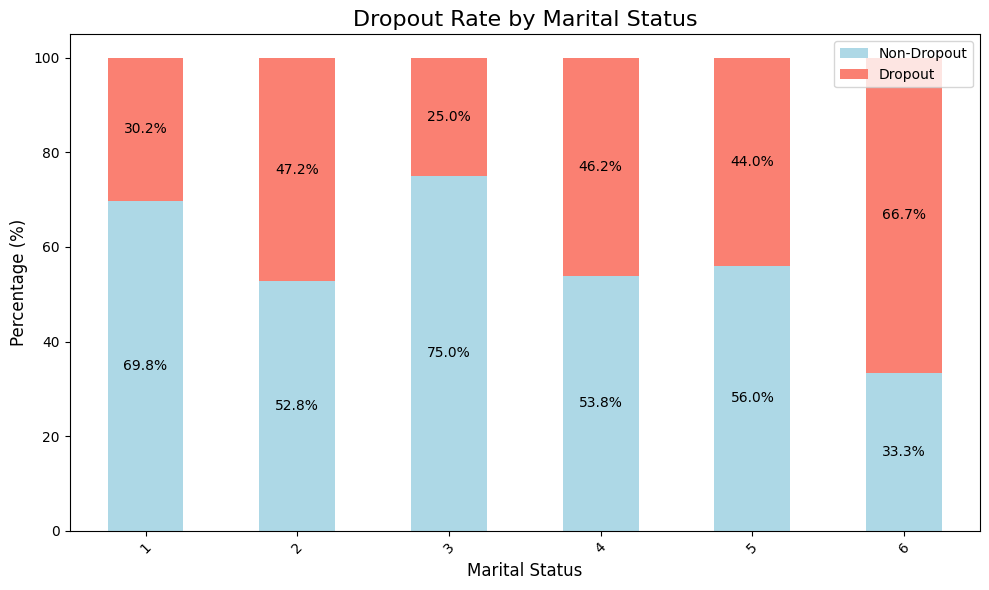

Chi-square test for Marital Status and Dropout:
Chi2 value: 59.45
p-value: 0.0000
Significance: Significant at α = 0.05


In [ ]:
# Analyze relationship between marital status and dropout
plt.figure(figsize=(12, 6))
marital_dropout = pd.crosstab(df['Marital status'], df['Target_Binary'],
                              normalize='index') * 100

ax = marital_dropout.plot(kind='bar', stacked=True,
                         color=['lightblue', 'salmon'], figsize=(10, 6))
plt.title('Dropout Rate by Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['Non-Dropout', 'Dropout'], loc='upper right')

# Add percentage labels
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x(), p.get_y()
    if height > 5:
        ax.text(x + width/2, y + height/2, f'{height:.1f}%',
                ha='center', va='center')

plt.tight_layout()
plt.show()

# Chi-square test
contingency = pd.crosstab(df['Marital status'], df['Target_Binary'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-square test for Marital Status and Dropout:")
print(f"Chi2 value: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"Significance: {'Significant' if p < 0.05 else 'Not significant'} at α = 0.05")

### 2.3 Macroeconomic Influence

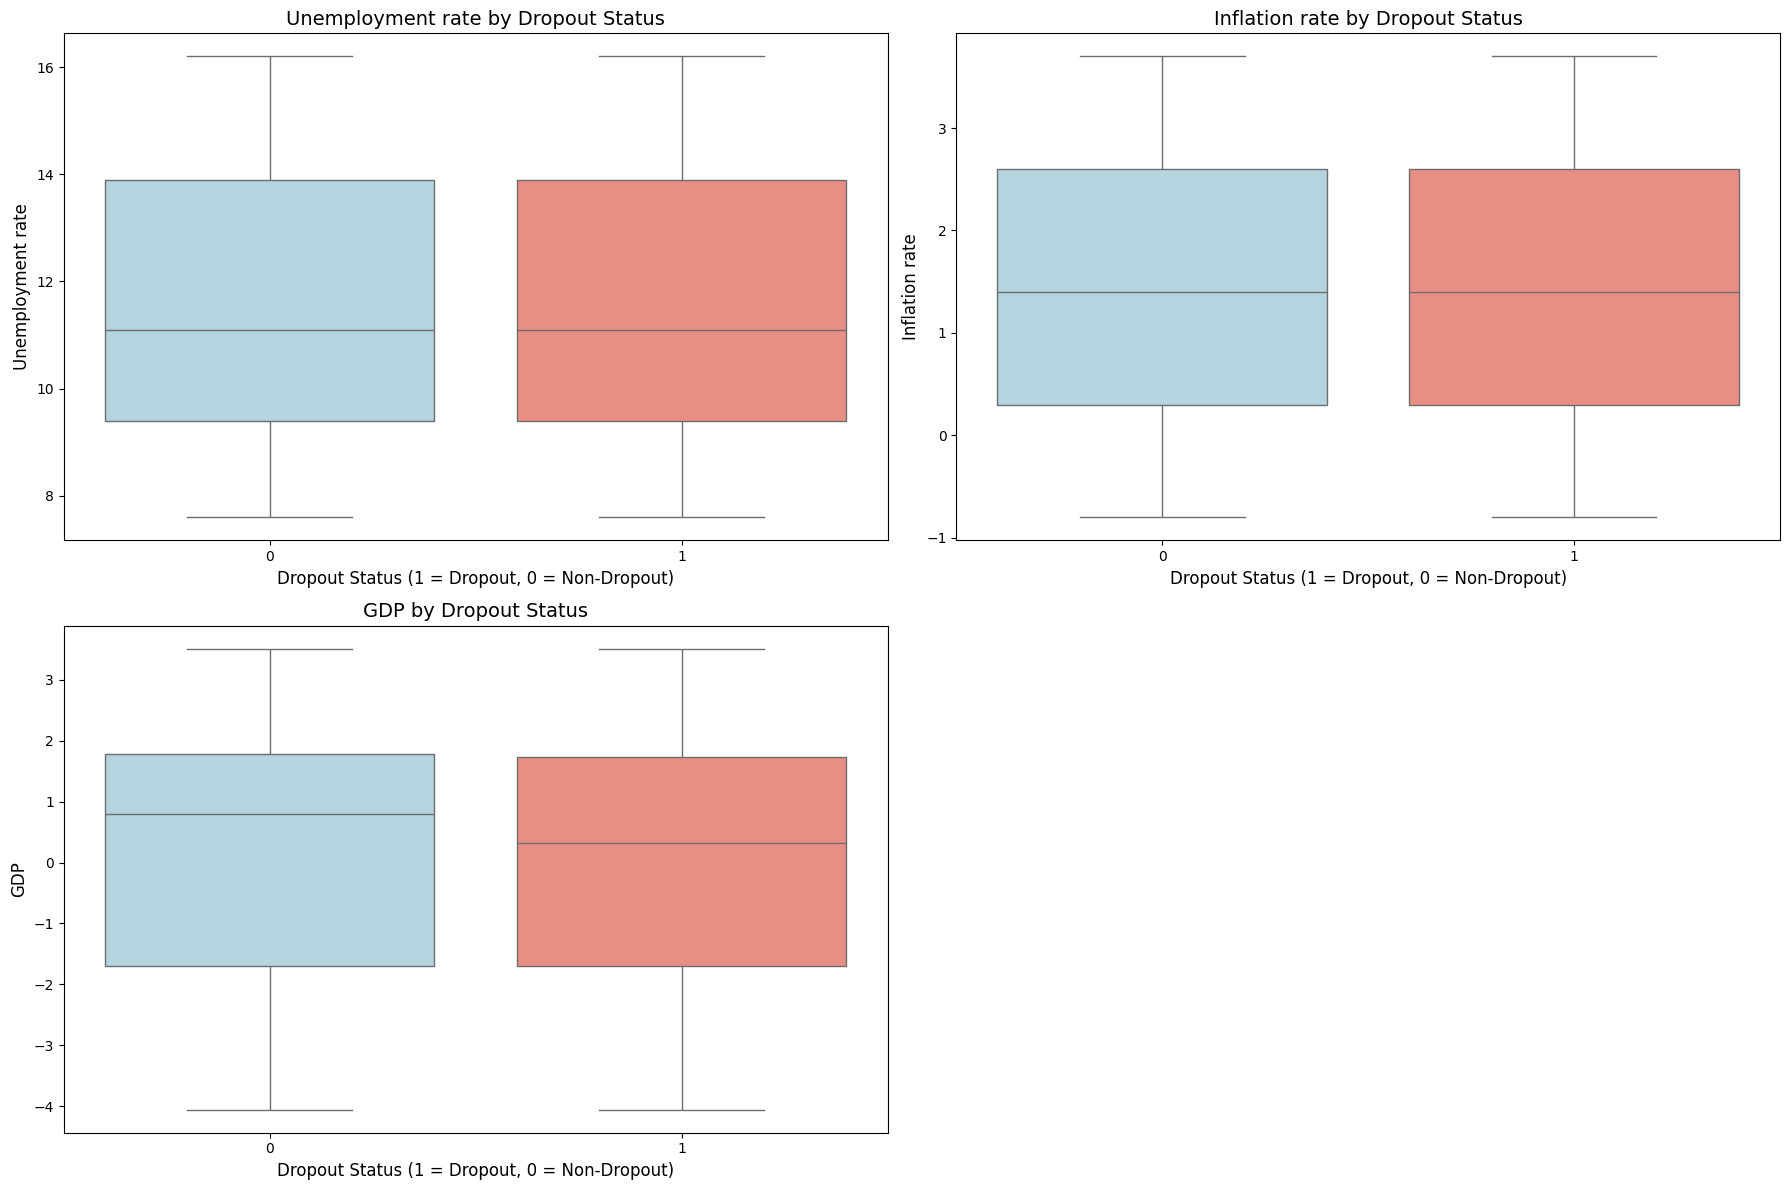

Mean economic indicators by dropout status:
               Unemployment rate  Inflation rate       GDP
Target_Binary                                             
0                      11.542358        1.201565  0.074286
1                      11.616397        1.283955 -0.150859

T-test for Unemployment rate:
t-statistic: -0.85
p-value: 0.3979
Significance: Not significant at α = 0.05

T-test for Inflation rate:
t-statistic: -1.84
p-value: 0.0666
Significance: Not significant at α = 0.05

T-test for GDP:
t-statistic: 3.09
p-value: 0.0020
Significance: Significant at α = 0.05


In [ ]:
# Analyze relationship between economic indicators and dropout
economic_vars = ['Unemployment rate', 'Inflation rate', 'GDP']

plt.figure(figsize=(18, 12))

for i, var in enumerate(economic_vars):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Target_Binary', y=var, data=df, palette=['lightblue', 'salmon'])
    plt.title(f'{var} by Dropout Status', fontsize=14)
    plt.xlabel('Dropout Status (1 = Dropout, 0 = Non-Dropout)', fontsize=12)
    plt.ylabel(var, fontsize=12)

plt.tight_layout()
plt.show()

# Calculate mean values for each economic indicator by dropout status
economic_means = df.groupby('Target_Binary')[economic_vars].mean()
print("Mean economic indicators by dropout status:")
print(economic_means)

# T-tests for statistical significance
from scipy.stats import ttest_ind

for var in economic_vars:
    stat, p = ttest_ind(df[df['Target_Binary']==0][var],
                         df[df['Target_Binary']==1][var],
                         equal_var=False)
    print(f"\nT-test for {var}:")
    print(f"t-statistic: {stat:.2f}")
    print(f"p-value: {p:.4f}")
    print(f"Significance: {'Significant' if p < 0.05 else 'Not significant'} at α = 0.05")

### 2.4 Financial Factors

The t-value indicates the magnitude of the difference between groups relative to the variability in the data. A larger absolute t-value suggests a stronger difference.
The p-value indicates statistical significance. A p-value < 0.05 typically suggests a significant association between the factor and dropout status.

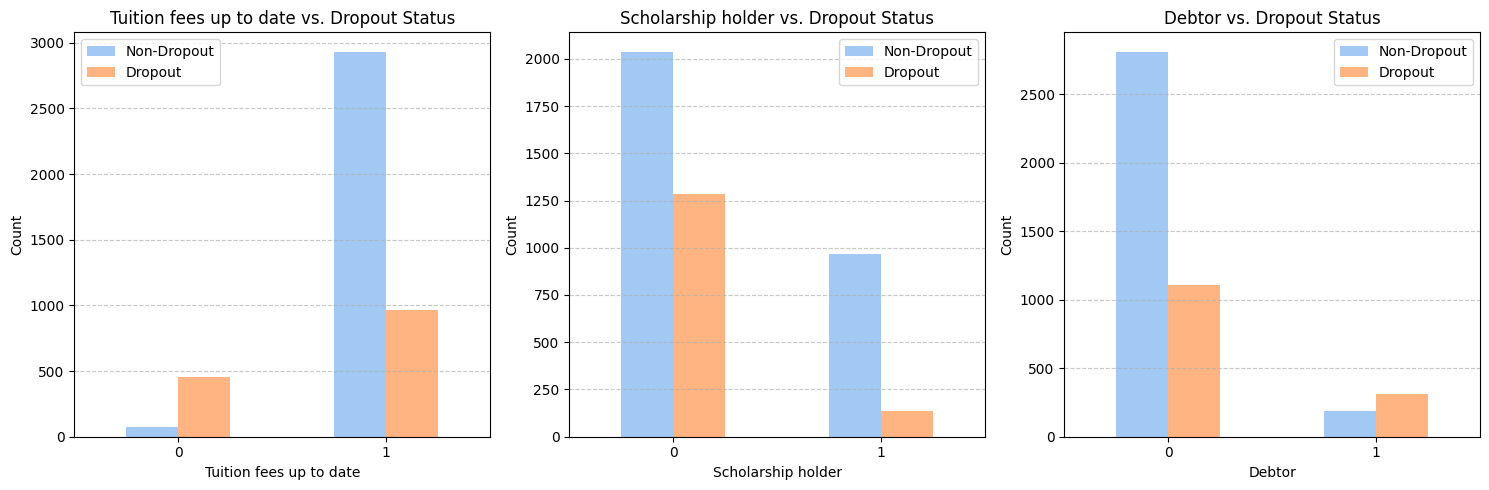

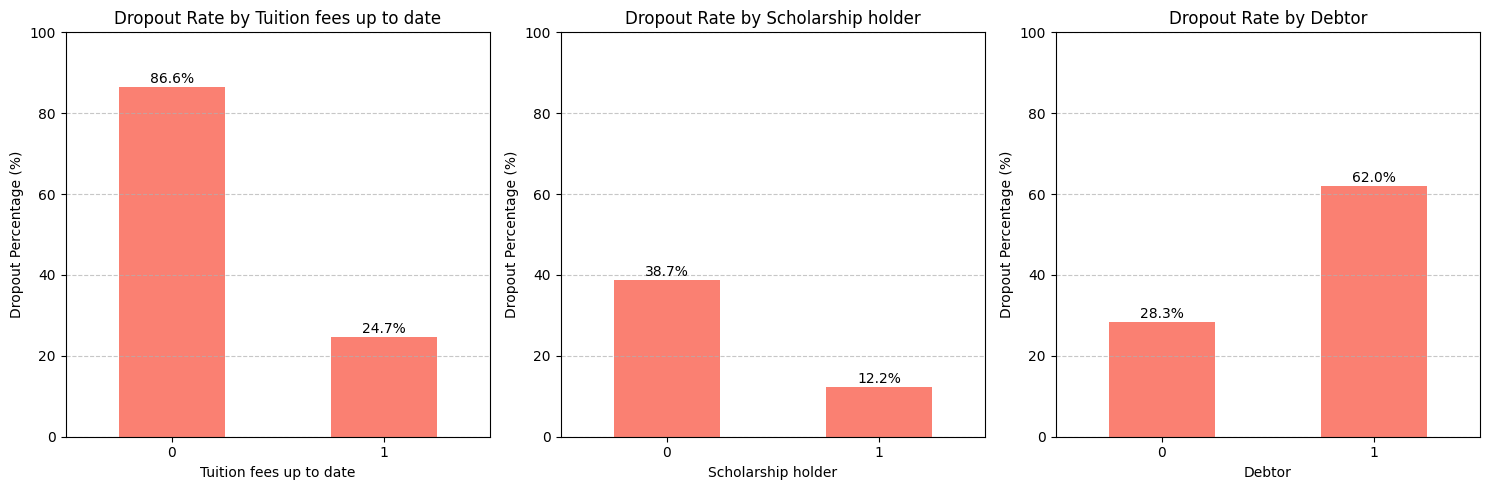

=== Financial Factors and Dropout Rates ===


--- Tuition fees up to date ---

Counts:
                         Non-Dropout  Dropout
Tuition fees up to date                      
0                                 71      457
1                               2932      964

Dropout Rates:
  0: 86.6%
  1: 24.7%

T-Test Results:
  T-value: 31.595
  P-value: 0.000

--- Scholarship holder ---

Counts:
                    Non-Dropout  Dropout
Scholarship holder                      
0                          2038     1287
1                           965      134

Dropout Rates:
  0: 38.7%
  1: 12.2%

T-Test Results:
  T-value: 16.830
  P-value: 0.000

--- Debtor ---

Counts:
        Non-Dropout  Dropout
Debtor                      
0              2812     1109
1               191      312

Dropout Rates:
  0: 28.3%
  1: 62.0%

T-Test Results:
  T-value: -15.673
  P-value: 0.000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Financial factors to analyze
financial_factors = ['Tuition fees up to date', 'Scholarship holder', 'Debtor']

# Create simple bar charts for each factor
plt.figure(figsize=(15, 5))

for i, factor in enumerate(financial_factors):
    plt.subplot(1, 3, i+1)

    # Simple cross-tabulation (counts)
    cross_tab = pd.crosstab(df[factor], df['Target_Binary'])

    # Label the columns properly
    cross_tab.columns = ['Non-Dropout', 'Dropout']

    # Create simple bar plot
    cross_tab.plot(kind='bar', ax=plt.gca())

    plt.title(f'{factor} vs. Dropout Status')
    plt.xlabel(factor)
    plt.ylabel('Count')
    plt.xticks(rotation=0)

    # Add a grid for readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Create simple percentage charts to show dropout rates
plt.figure(figsize=(15, 5))

for i, factor in enumerate(financial_factors):
    plt.subplot(1, 3, i+1)

    # Calculate percentages within each category
    cross_tab_pct = pd.crosstab(df[factor], df['Target_Binary'],
                               normalize='index') * 100

    # Label the columns properly
    cross_tab_pct.columns = ['Non-Dropout %', 'Dropout %']

    # Create simple bar plot
    cross_tab_pct['Dropout %'].plot(kind='bar', color='salmon', ax=plt.gca())

    plt.title(f'Dropout Rate by {factor}')
    plt.xlabel(factor)
    plt.ylabel('Dropout Percentage (%)')
    plt.xticks(rotation=0)

    # Add value labels on bars
    for j, v in enumerate(cross_tab_pct['Dropout %']):
        plt.text(j, v + 1, f"{v:.1f}%", ha='center')

    # Set consistent y-axis for comparison
    plt.ylim(0, 100)

    # Add a grid for readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Print simple summary statistics
print("=== Financial Factors and Dropout Rates ===\n")

for factor in financial_factors:
    print(f"\n--- {factor} ---")

    # Get the counts
    counts = pd.crosstab(df[factor], df['Target_Binary'])
    counts.columns = ['Non-Dropout', 'Dropout']
    print("\nCounts:")
    print(counts)

    # Calculate dropout rates
    total = counts.sum(axis=1)
    dropout_rate = (counts['Dropout'] / total) * 100

    print("\nDropout Rates:")
    for category, rate in dropout_rate.items():
        print(f"  {category}: {rate:.1f}%")

    # Perform t-test
    group0 = df[df[factor] == 0]['Target_Binary']
    group1 = df[df[factor] == 1]['Target_Binary']
    t_stat, p_value = ttest_ind(group0, group1, nan_policy='omit')

    print("\nT-Test Results:")
    print(f"  T-value: {t_stat:.3f}")
    print(f"  P-value: {p_value:.3f}")


### 2.5 Academic Performance

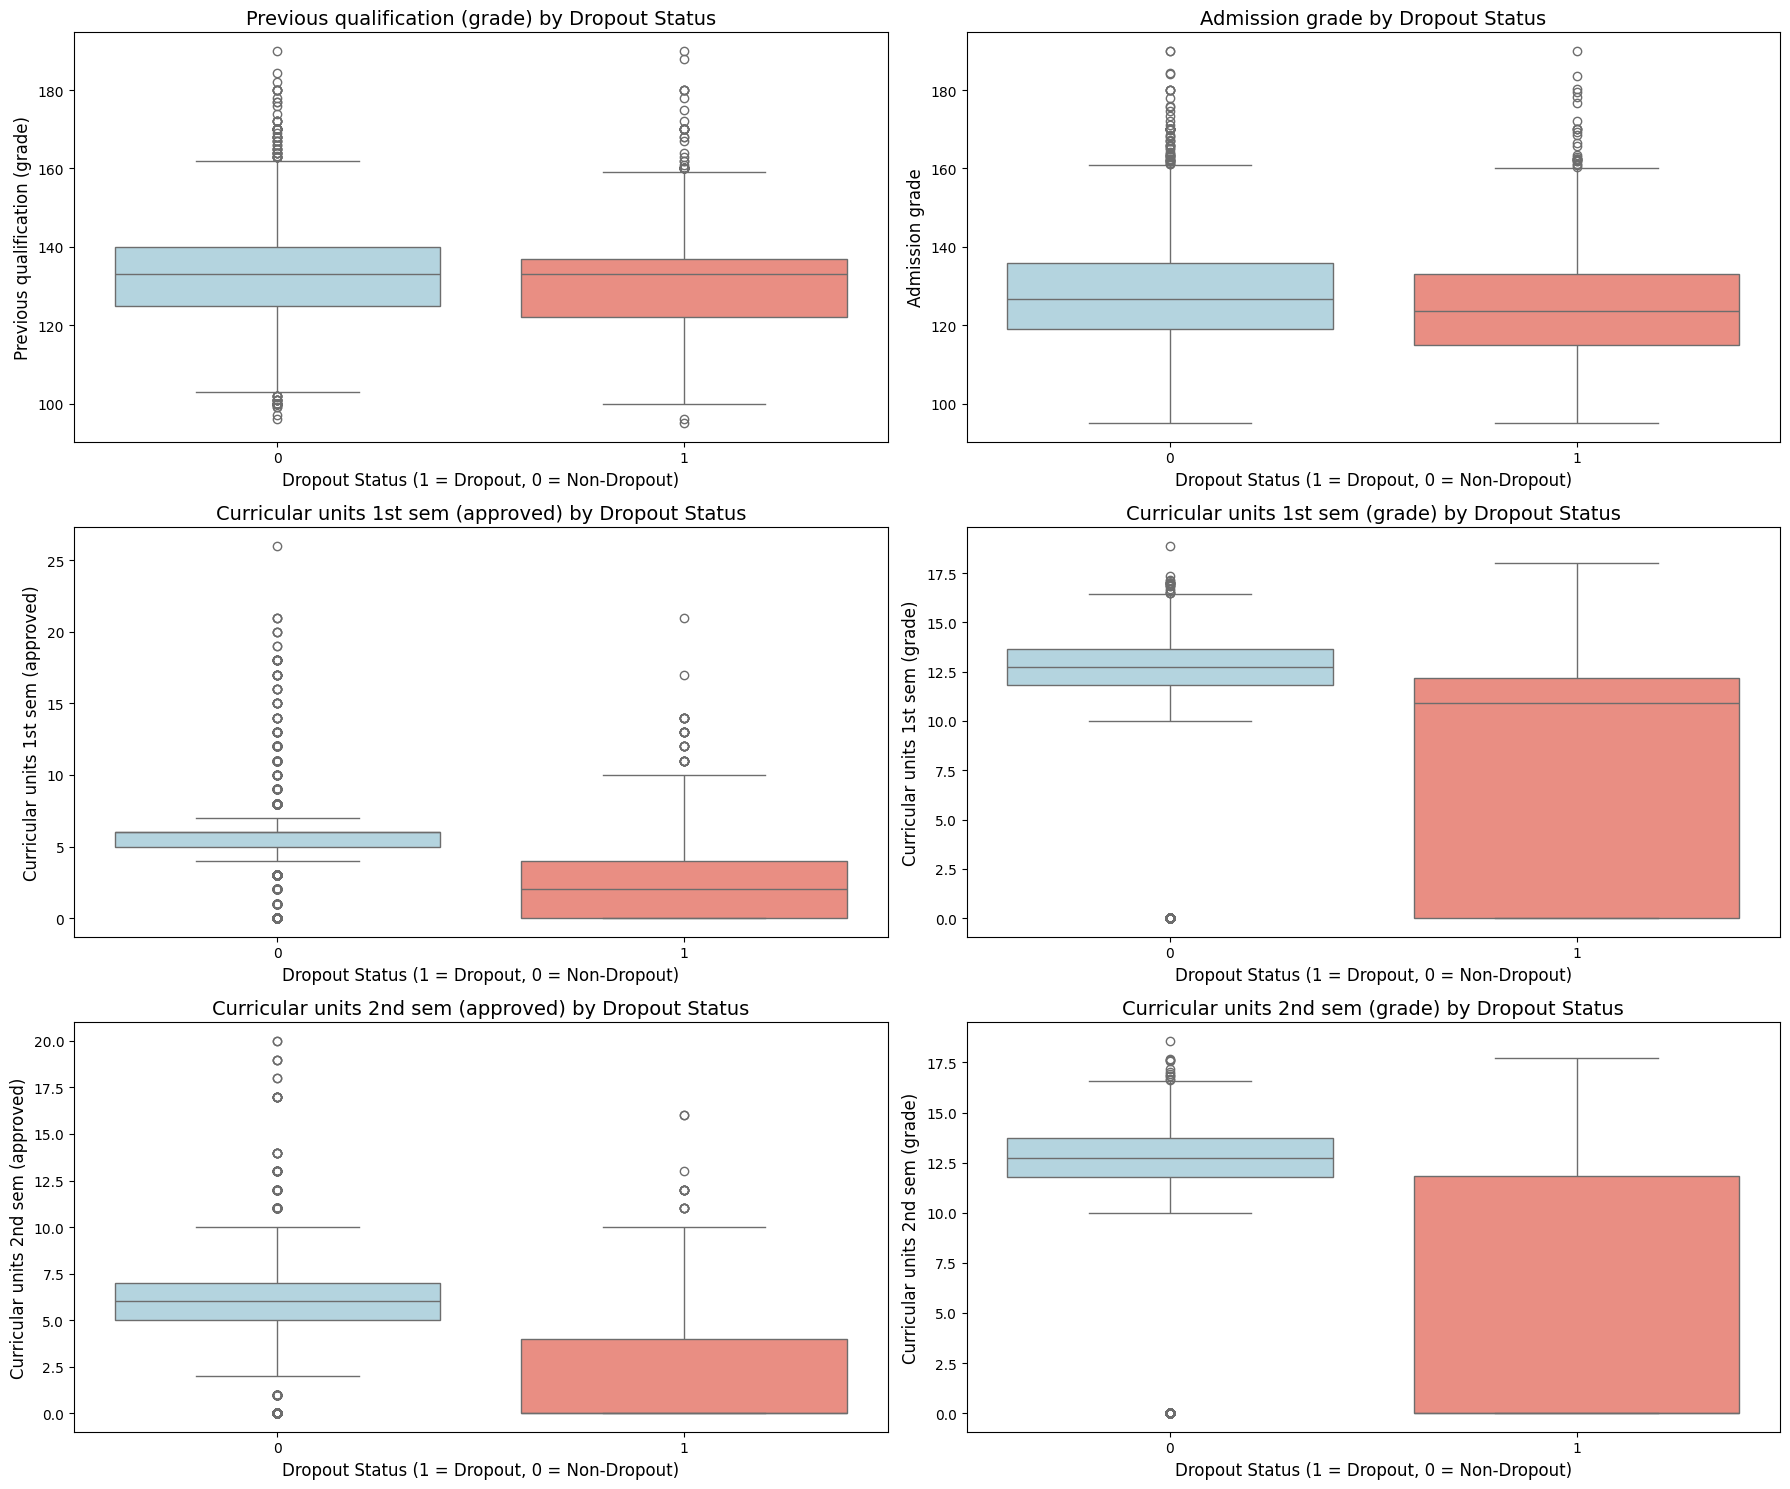

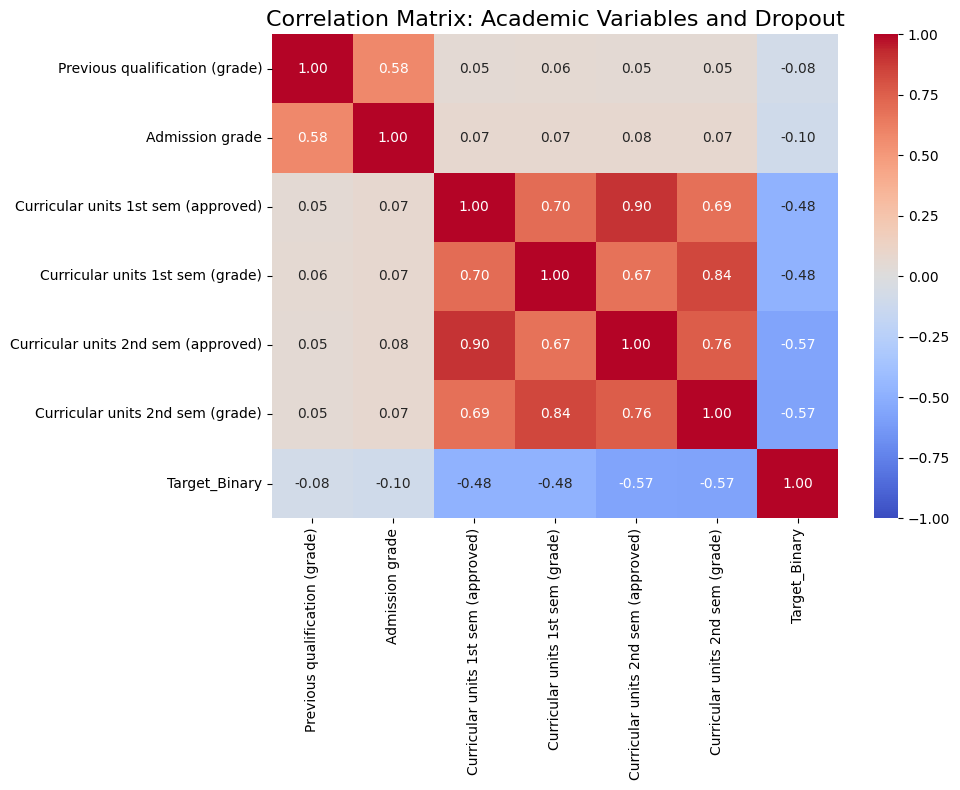


T-test for Previous qualification (grade):
t-statistic: 5.27
p-value: 0.0000
Significance: Significant at α = 0.05

T-test for Admission grade:
t-statistic: 6.24
p-value: 0.0000
Significance: Significant at α = 0.05

T-test for Curricular units 1st sem (approved):
t-statistic: 35.32
p-value: 0.0000
Significance: Significant at α = 0.05

T-test for Curricular units 1st sem (grade):
t-statistic: 29.42
p-value: 0.0000
Significance: Significant at α = 0.05

T-test for Curricular units 2nd sem (approved):
t-statistic: 45.15
p-value: 0.0000
Significance: Significant at α = 0.05

T-test for Curricular units 2nd sem (grade):
t-statistic: 37.20
p-value: 0.0000
Significance: Significant at α = 0.05


In [ ]:
# Analyze academic performance and dropout
academic_vars = ['Previous qualification (grade)', 'Admission grade',
                 'Curricular units 1st sem (approved)',
                 'Curricular units 1st sem (grade)',
                 'Curricular units 2nd sem (approved)',
                 'Curricular units 2nd sem (grade)']

plt.figure(figsize=(18, 15))

for i, var in enumerate(academic_vars):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='Target_Binary', y=var, data=df, palette=['lightblue', 'salmon'])
    plt.title(f'{var} by Dropout Status', fontsize=14)
    plt.xlabel('Dropout Status (1 = Dropout, 0 = Non-Dropout)', fontsize=12)
    plt.ylabel(var, fontsize=12)

plt.tight_layout()
plt.show()

# Create a dataframe with academic variables and the target
academic_df = df[academic_vars + ['Target_Binary']]

# Calculate correlation matrix
corr_matrix = academic_df.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix: Academic Variables and Dropout', fontsize=16)
plt.tight_layout()
plt.show()
# T-tests for statistical significance
for var in academic_vars:
    stat, p = ttest_ind(df[df['Target_Binary']==0][var],
                         df[df['Target_Binary']==1][var],
                         equal_var=False)
    print(f"\nT-test for {var}:")
    print(f"t-statistic: {stat:.2f}")
    print(f"p-value: {p:.4f}")
    print(f"Significance: {'Significant' if p < 0.05 else 'Not significant'} at α = 0.05")

# **3. Data Preprocessing**

### 3.1 Data Cleaning and Encoding

In [ ]:
# Focus on binary classification: Dropout vs. Non-dropout (combining Graduate and Enrolled)
df['Target_Binary'] = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

# Select relevant features and target
# Exclude certain columns that might not be relevant or redundant
exclude_cols = ['Target']
features = [col for col in df.columns if col not in exclude_cols and col != 'Target_Binary']
X = df[features]
y = df['Target_Binary']

# Handle missing or zero values in grade columns
for col in X.columns:
    if 'grade' in col:
        X[col] = X[col].replace(0, np.nan)
        X[col] = X[col].fillna(X[col].median())

# Check for high cardinality categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
categorical_features += [col for col in X.columns if col in ['Course', 'Application mode', 'Nacionality']]

print("\nCategorical features:")
for col in categorical_features:
    if col in X.columns:
        print(f"{col}: {X[col].nunique()} unique values")


Categorical features:
Application mode: 18 unique values
Course: 17 unique values
Nacionality: 21 unique values


### 3.2 Feature Engineering

In [ ]:
# Create new features that might be predictive
# Academic performance gap
X['admission_1st_sem_gap'] = X['Curricular units 1st sem (grade)'] - X['Admission grade']
X['1st_2nd_sem_gap'] = X['Curricular units 2nd sem (grade)'] - X['Curricular units 1st sem (grade)']

# Approval rates
X['1st_sem_approval_rate'] = X['Curricular units 1st sem (approved)'] / (X['Curricular units 1st sem (enrolled)'] + 0.1)
X['2nd_sem_approval_rate'] = X['Curricular units 2nd sem (approved)'] / (X['Curricular units 2nd sem (enrolled)'] + 0.1)

# Evaluation participation rate
X['1st_sem_eval_participation'] = X['Curricular units 1st sem (evaluations)'] / (X['Curricular units 1st sem (enrolled)'] + 0.1)
X['2nd_sem_eval_participation'] = X['Curricular units 2nd sem (evaluations)'] / (X['Curricular units 2nd sem (enrolled)'] + 0.1)

# Economic composite indicator
X['economic_index'] = (X['GDP'] * 0.4) - (X['Unemployment rate'] * 0.4) - (X['Inflation rate'] * 0.2)

# Print the new features
print("\nNew engineered features:")
for col in ['admission_1st_sem_gap', '1st_2nd_sem_gap', '1st_sem_approval_rate',
            '2nd_sem_approval_rate', '1st_sem_eval_participation', '2nd_sem_eval_participation',
            'economic_index']:
    print(f"{col}: Range [{X[col].min():.2f} to {X[col].max():.2f}], Mean: {X[col].mean():.2f}")


New engineered features:
admission_1st_sem_gap: Range [-178.43 to -81.10], Mean: -114.29
1st_2nd_sem_gap: Range [-6.00 to 6.00], Mean: 0.03
1st_sem_approval_rate: Range [0.00 to 1.00], Mean: 0.69
2nd_sem_approval_rate: Range [0.00 to 0.99], Mean: 0.65
1st_sem_eval_participation: Range [0.00 to 3.44], Mean: 1.27
2nd_sem_eval_participation: Range [0.00 to 3.77], Mean: 1.24
economic_index: Range [-8.38 to -2.44], Mean: -4.87


### 3.3 Outlier Detection and Handling

In [ ]:
# Detect outliers using IQR method for key numerical features
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Check outliers in key academic columns
academic_cols = ['Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']
for col in academic_cols:
    outliers = detect_outliers_iqr(X, col)
    print(f"Outliers in {col}: {len(outliers)} ({len(outliers)/len(X)*100:.2f}%)")

# Instead of removing outliers, apply capping
for col in academic_cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X[col] = X[col].clip(lower=lower_bound, upper=upper_bound)

print("\nOutliers handled by capping")

Outliers in Admission grade: 86 (1.94%)
Outliers in Curricular units 1st sem (grade): 95 (2.15%)
Outliers in Curricular units 2nd sem (grade): 131 (2.96%)

Outliers handled by capping


### 3.4 Feature Selection

In [ ]:

# Select most relevant features using SelectKBest
numerical_features = X.select_dtypes(include=['number']).columns.tolist()
X_numerical = X[numerical_features]

# Fill any remaining NaN values with median
X_numerical = X_numerical.fillna(X_numerical.median())

# Apply feature selection
selector = SelectKBest(score_func=f_classif, k=15)
X_new = selector.fit_transform(X_numerical, y)

# Get selected feature names
selected_features_mask = selector.get_support()
selected_features = [numerical_features[i] for i in range(len(numerical_features)) if selected_features_mask[i]]

# Print selected features and their scores
feature_scores = pd.DataFrame({
    'Feature': numerical_features,
    'Score': selector.scores_
})
print("\nTop 15 features by F-score:")
print(feature_scores.sort_values(by='Score', ascending=False).head(15))


Top 15 features by F-score:
                                   Feature        Score
39                   2nd_sem_approval_rate  3406.005958
38                   1st_sem_approval_rate  2378.338955
30     Curricular units 2nd sem (approved)  2122.620090
24     Curricular units 1st sem (approved)  1317.490529
16                 Tuition fees up to date   998.240942
19                       Age at enrollment   305.518224
18                      Scholarship holder   283.249150
15                                  Debtor   245.647627
25        Curricular units 1st sem (grade)   205.365402
17                                  Gender   191.982773
1                         Application mode   181.303785
31        Curricular units 2nd sem (grade)   170.660775
29  Curricular units 2nd sem (evaluations)   108.851844
28     Curricular units 2nd sem (enrolled)    90.366798
22     Curricular units 1st sem (enrolled)    69.774180


### 3.5 Data Balancing with SMOTE

In [ ]:
# Check class imbalance
print("\nClass distribution before balancing:")
print(y.value_counts())
print(f"Dropout percentage: {y.mean()*100:.2f}%")

# Apply SMOTE to balance the classes
X_numerical_selected = X_numerical[selected_features]
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_numerical_selected, y)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())
print(f"Dropout percentage: {pd.Series(y_resampled).mean()*100:.2f}%")


Class distribution before balancing:
Target_Binary
0    3003
1    1421
Name: count, dtype: int64
Dropout percentage: 32.12%

Class distribution after SMOTE:
Target_Binary
1    3003
0    3003
Name: count, dtype: int64
Dropout percentage: 50.00%


# **4. Predictive Modeling**

## 4.1 Data Splitting

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.25, random_state=42, stratify=y_resampled
)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (4504, 15)
Testing set shape: (1502, 15)


## 4.2 Model Training and Evaluation


Logistic Regression Results:
Accuracy: 0.8728
AUC: 0.9397

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       751
           1       0.90      0.84      0.87       751

    accuracy                           0.87      1502
   macro avg       0.87      0.87      0.87      1502
weighted avg       0.87      0.87      0.87      1502



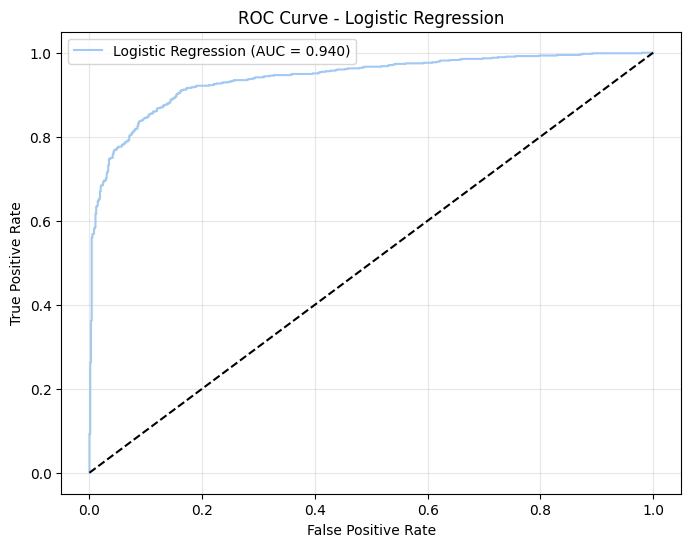

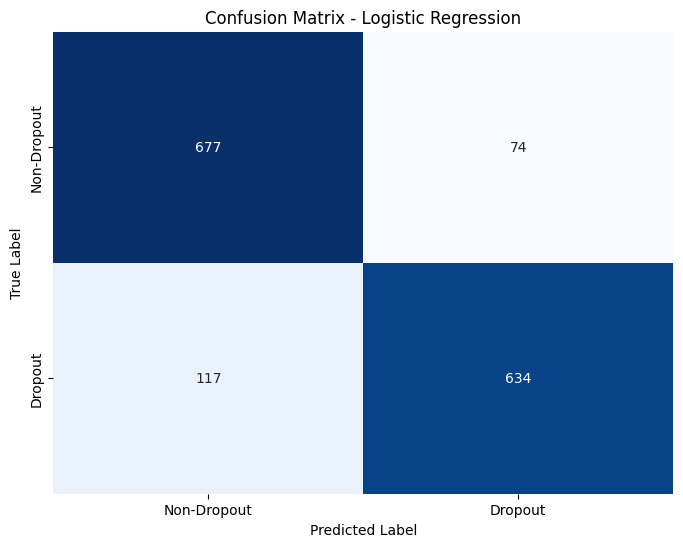


Random Forest Results:
Accuracy: 0.9008
AUC: 0.9636

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       751
           1       0.91      0.89      0.90       751

    accuracy                           0.90      1502
   macro avg       0.90      0.90      0.90      1502
weighted avg       0.90      0.90      0.90      1502



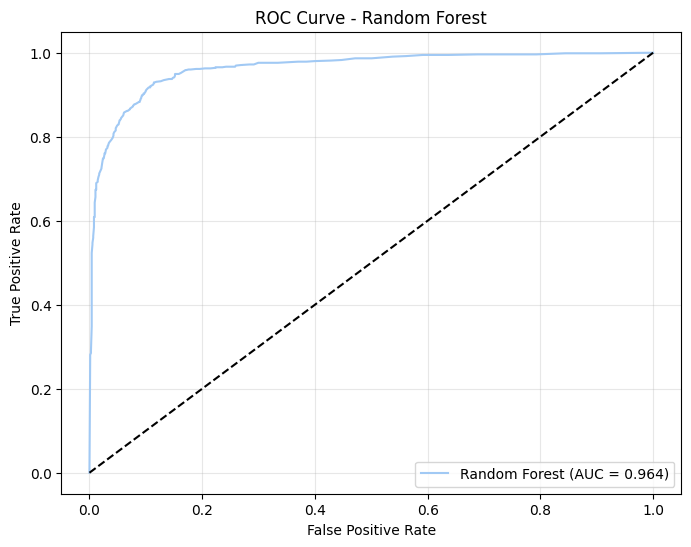

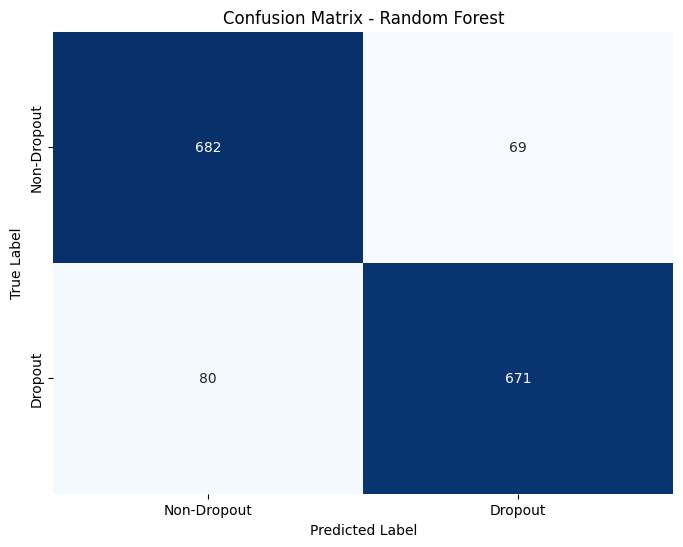


Gradient Boosting Results:
Accuracy: 0.8901
AUC: 0.9514

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       751
           1       0.90      0.87      0.89       751

    accuracy                           0.89      1502
   macro avg       0.89      0.89      0.89      1502
weighted avg       0.89      0.89      0.89      1502



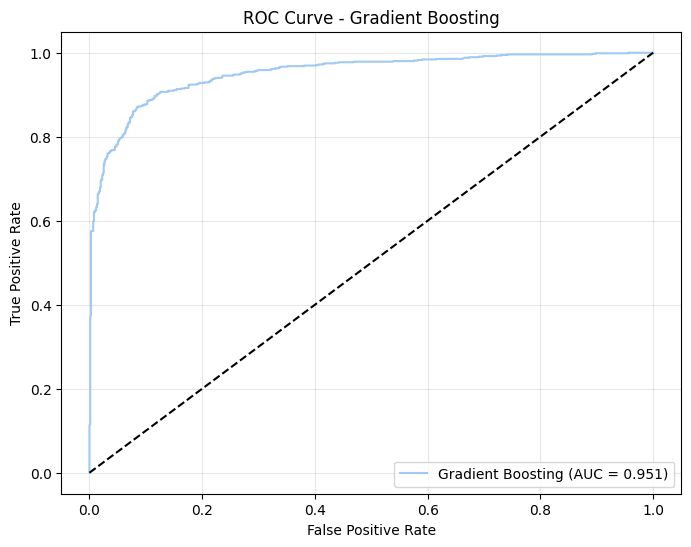

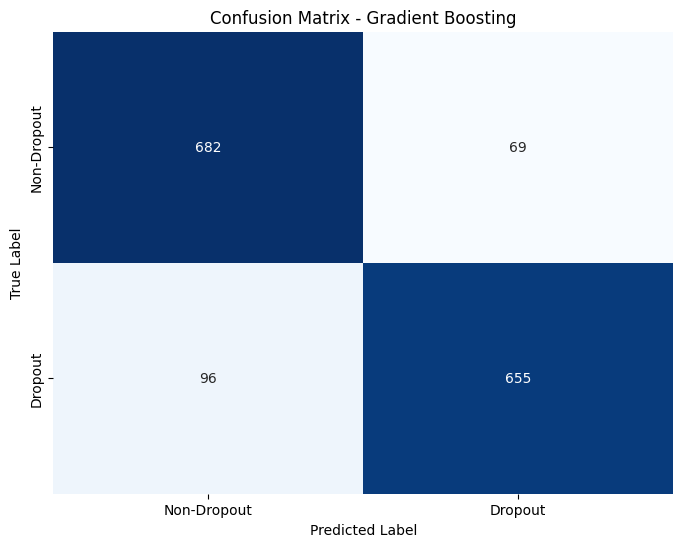


Decision Tree Results:
Accuracy: 0.8395
AUC: 0.8455

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       751
           1       0.84      0.84      0.84       751

    accuracy                           0.84      1502
   macro avg       0.84      0.84      0.84      1502
weighted avg       0.84      0.84      0.84      1502



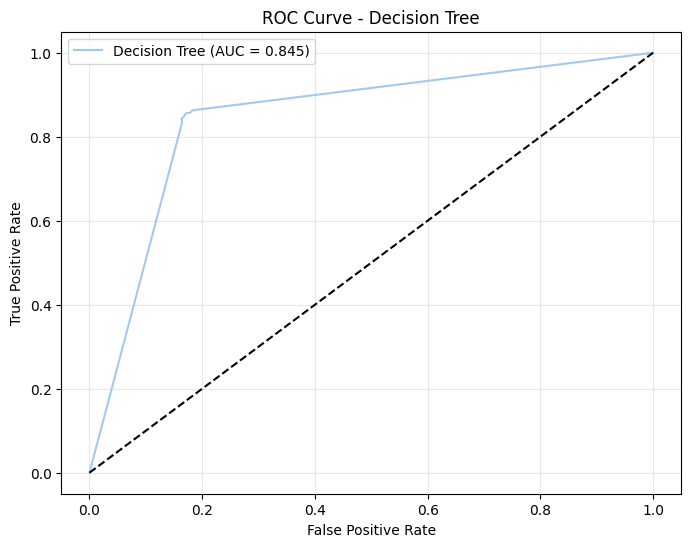

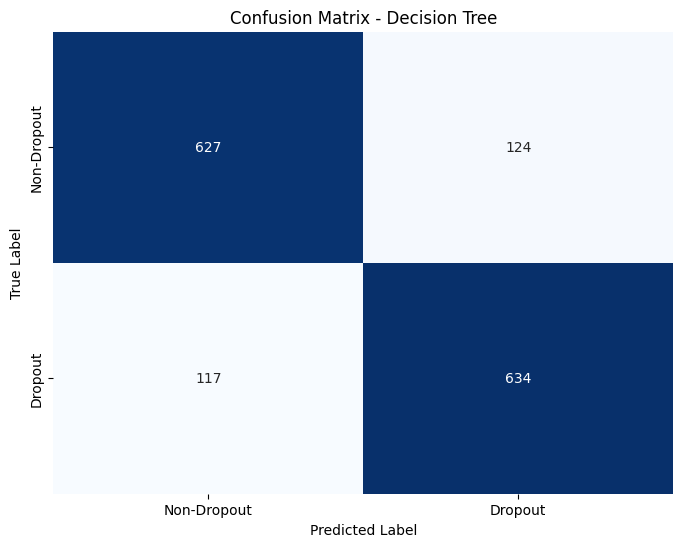


Support Vector Machine Results:
Accuracy: 0.8702
AUC: 0.9457

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       751
           1       0.89      0.85      0.87       751

    accuracy                           0.87      1502
   macro avg       0.87      0.87      0.87      1502
weighted avg       0.87      0.87      0.87      1502



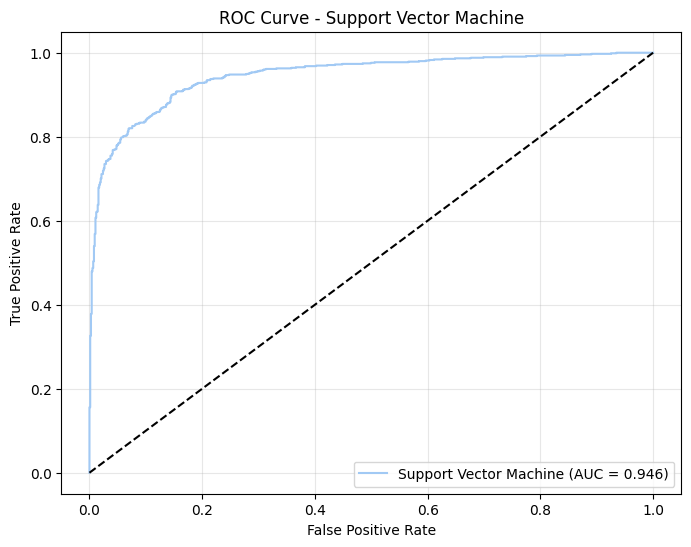

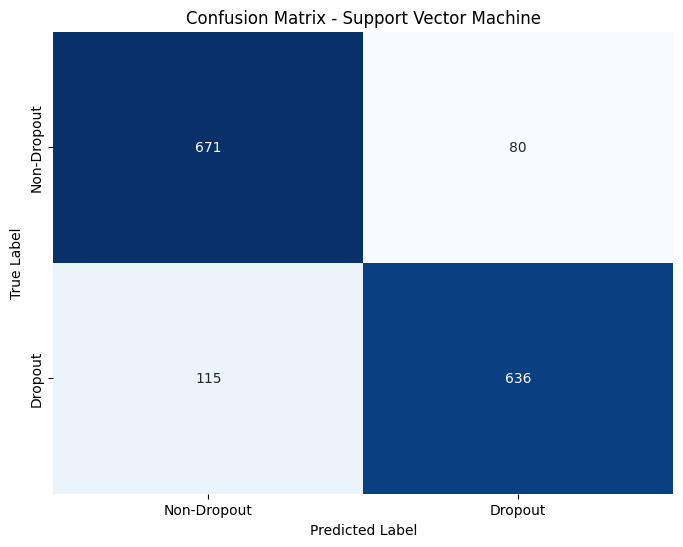

In [ ]:
# Function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)

    # ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='best')
    plt.grid(alpha=0.3)
    plt.show()

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks([0.5, 1.5], ['Non-Dropout', 'Dropout'])
    plt.yticks([0.5, 1.5], ['Non-Dropout', 'Dropout'])
    plt.show()

    return model, accuracy, auc

# Apply standardization to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train multiple models
# 1. Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model, lr_accuracy, lr_auc = evaluate_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test, "Logistic Regression")

# 2. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model, rf_accuracy, rf_auc = evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")

# 3. Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model, gb_accuracy, gb_auc = evaluate_model(gb_model, X_train, X_test, y_train, y_test, "Gradient Boosting")

# 4. Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model, dt_accuracy, dt_auc = evaluate_model(dt_model, X_train, X_test, y_train, y_test, "Decision Tree")

# 5. Support Vector Machine
from sklearn.svm import SVC
svm_model = SVC(probability=True, random_state=42)
svm_model, svm_accuracy, svm_auc = evaluate_model(svm_model, X_train_scaled, X_test_scaled, y_train, y_test, "Support Vector Machine")

## 4.3 Feature Importance Analysis

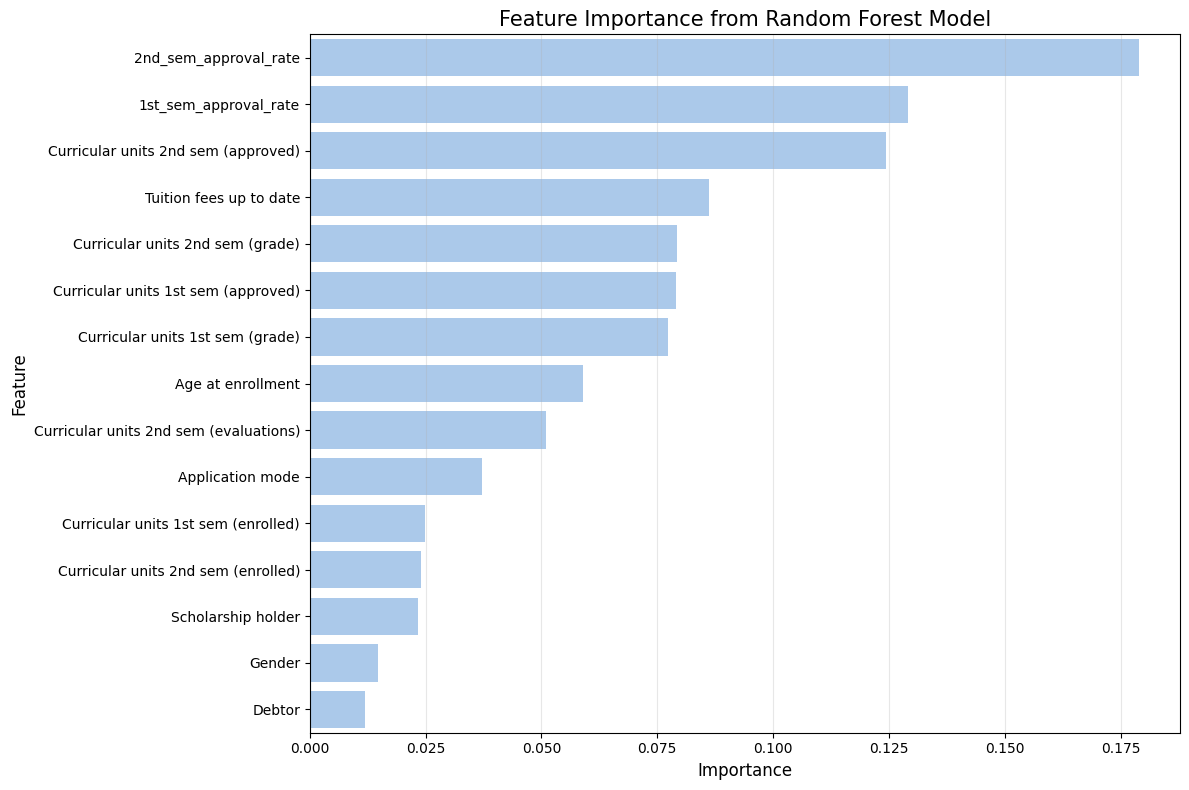


Top 10 important features:
                                   Feature  Importance
14                   2nd_sem_approval_rate    0.178866
13                   1st_sem_approval_rate    0.129032
11     Curricular units 2nd sem (approved)    0.124372
2                  Tuition fees up to date    0.086186
12        Curricular units 2nd sem (grade)    0.079283
7      Curricular units 1st sem (approved)    0.079028
8         Curricular units 1st sem (grade)    0.077386
5                        Age at enrollment    0.058955
10  Curricular units 2nd sem (evaluations)    0.050899
0                         Application mode    0.037220


In [ ]:
# Get feature importance from Random Forest model
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance from Random Forest Model', fontsize=15)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTop 10 important features:")
print(feature_importance.head(10))


## 4.4 Model Comparison


Model Performance Comparison:
                    Model  Accuracy       AUC
1           Random Forest  0.900799  0.963552
2       Gradient Boosting  0.890146  0.951387
4  Support Vector Machine  0.870173  0.945742
0     Logistic Regression  0.872836  0.939729
3           Decision Tree  0.839547  0.845475


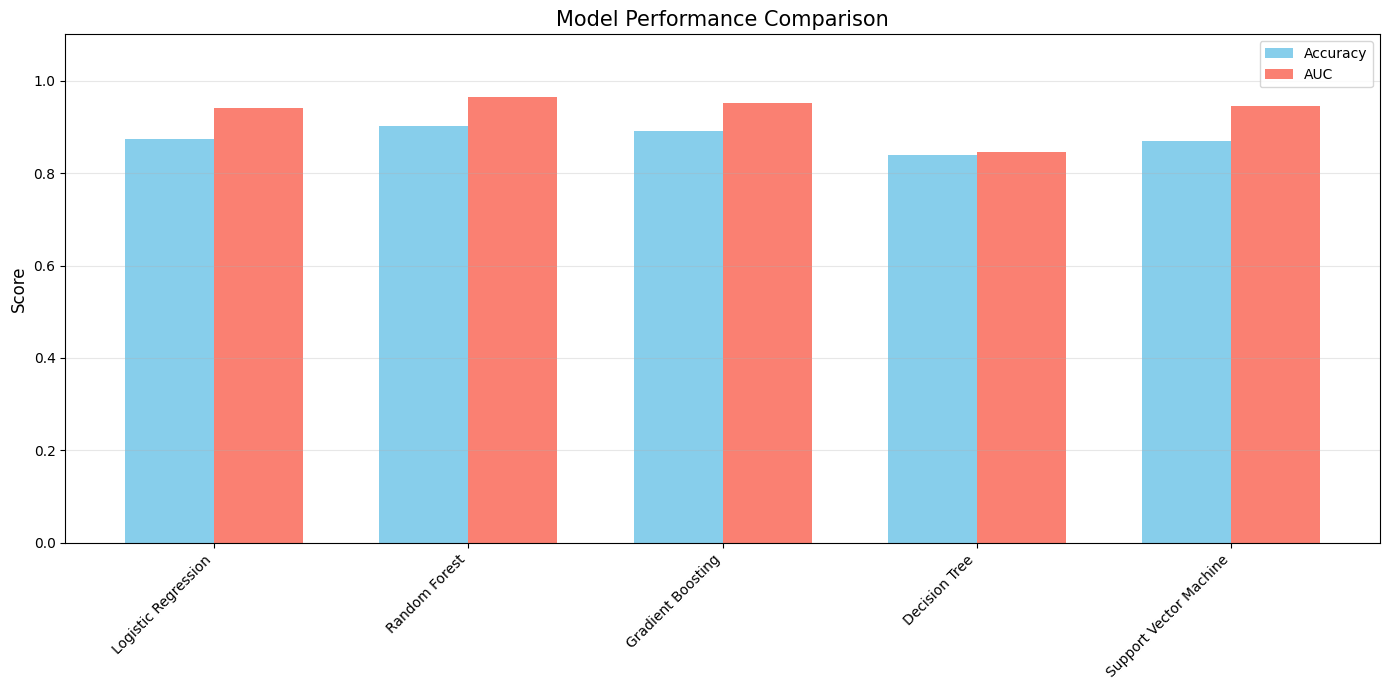


Random Forest 5-Fold Cross-Validation AUC Scores: [0.93493373 0.93284803 0.95222546 0.9796173  0.96913755]
Mean AUC: 0.9538, Std Dev: 0.0184


In [ ]:
# Compare all models visually
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree', 'Support Vector Machine']
accuracies = [lr_accuracy, rf_accuracy, gb_accuracy, dt_accuracy, svm_accuracy]
aucs = [lr_auc, rf_auc, gb_auc, dt_auc, svm_auc]

# Create a dataframe for comparison
model_comparison = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'AUC': aucs
})

print("\nModel Performance Comparison:")
print(model_comparison.sort_values('AUC', ascending=False))

# Plot model comparison
plt.figure(figsize=(14, 7))
width = 0.35
x = np.arange(len(models))
plt.bar(x - width/2, accuracies, width, label='Accuracy', color='skyblue')
plt.bar(x + width/2, aucs, width, label='AUC', color='salmon')
plt.title('Model Performance Comparison', fontsize=15)
plt.xticks(x, models, rotation=45, ha='right')
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Cross-validation for the best model (Random Forest)
cv_scores = cross_val_score(rf_model, X_resampled, y_resampled, cv=5, scoring='roc_auc')
print(f"\nRandom Forest 5-Fold Cross-Validation AUC Scores: {cv_scores}")
print(f"Mean AUC: {cv_scores.mean():.4f}, Std Dev: {cv_scores.std():.4f}")